In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 455s 3us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

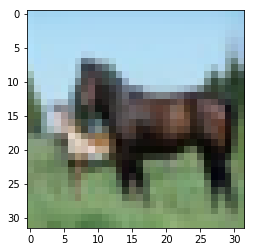

In [8]:
plt.imshow(x_train[12])

In [9]:
x_train[0].max()

255

In [10]:
x_train= x_train/255
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
y_train.shape

(50000, 1)

In [12]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [15]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_train[0]

array([6], dtype=uint8)

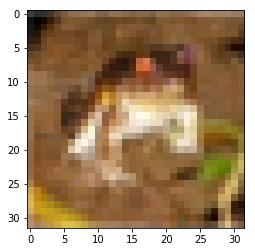

In [17]:
plt.imshow(x_train[0])

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_test.shape

(10000, 10)

In [47]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD

In [126]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum = 0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt ,metrics=['accuracy'])


In [127]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)       

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

In [129]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [130]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 599s 12ms/sample - loss: 1.8636 - accuracy: 0.3604 - val_loss: 1.3677 - val_accuracy: 0.5005
Epoch 2/20
50000/50000 [==============================] - 455s 9ms/sample - loss: 1.3882 - accuracy: 0.4960 - val_loss: 1.2512 - val_accuracy: 0.5424
Epoch 3/20
50000/50000 [==============================] - 423s 8ms/sample - loss: 1.2131 - accuracy: 0.5643 - val_loss: 1.1246 - val_accuracy: 0.5852
Epoch 4/20
50000/50000 [==============================] - 437s 9ms/sample - loss: 1.0932 - accuracy: 0.6106 - val_loss: 0.9034 - val_accuracy: 0.6785
Epoch 5/20
50000/50000 [==============================] - 559s 11ms/sample - loss: 1.0127 - accuracy: 0.6431 - val_loss: 0.9004 - val_accuracy: 0.6767
Epoch 6/20
50000/50000 [==============================] - 3144s 63ms/sample - loss: 0.9483 - accuracy: 0.6676 - val_loss: 0.7755 - val_accuracy: 0.7241
Epoch 7/20
50000/50000 [======================

In [131]:
metrices = pd.DataFrame(model.history.history)

In [132]:
metrices

,loss,accuracy,val_loss,val_accuracy
0,1.863571,0.36042,1.367666,0.5005
1,1.388179,0.49602,1.251197,0.5424
2,1.213085,0.56434,1.124603,0.5852
3,1.093163,0.61058,0.903412,0.6785
4,1.012676,0.64310,0.900373,0.6767
5,0.948322,0.66762,0.775497,0.7241
6,0.893294,0.68674,0.827968,0.7074
7,0.847967,0.70464,0.859334,0.6991
8,0.809632,0.71646,0.735496,0.7426
9,0.785949,0.72598,0.681888,0.7608


In [133]:
metrices.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

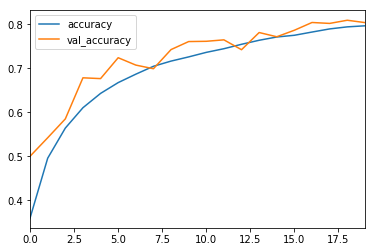

In [134]:
metrices[['accuracy','val_accuracy']].plot()

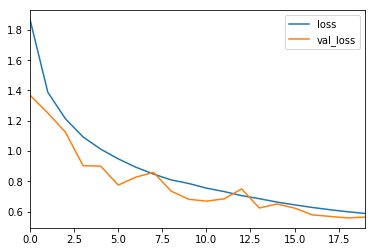

In [135]:
metrices[['loss','val_loss']].plot()

In [136]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.5638884754657746, 0.8039]

In [137]:
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
predictions = model.predict_classes(x_test)

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.80      1000
           1       0.95      0.88      0.91      1000
           2       0.80      0.64      0.71      1000
           3       0.68      0.61      0.64      1000
           4       0.72      0.85      0.78      1000
           5       0.71      0.73      0.72      1000
           6       0.84      0.87      0.85      1000
           7       0.88      0.84      0.86      1000
           8       0.81      0.94      0.87      1000
           9       0.86      0.91      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [140]:
confusion_matrix(y_test,predictions)

array([[776,   9,  23,  17,  27,   4,   9,  10, 102,  23],
       [ 15, 876,   1,   1,   3,   2,   4,   1,  19,  78],
       [ 59,   1, 644,  38,  95,  60,  58,  20,  18,   7],
       [ 10,   1,  42, 611,  66, 151,  56,  22,  27,  14],
       [  6,   1,  26,  30, 853,  18,  24,  27,  15,   0],
       [  4,   1,  19, 135,  53, 728,   9,  32,  10,   9],
       [  3,   2,  27,  34,  36,  19, 868,   2,   8,   1],
       [  9,   1,  18,  24,  51,  43,   3, 839,   4,   8],
       [ 22,   8,   6,   4,   4,   1,   3,   2, 938,  12],
       [ 25,  26,   2,   5,   2,   3,   4,   3,  24, 906]], dtype=int64)

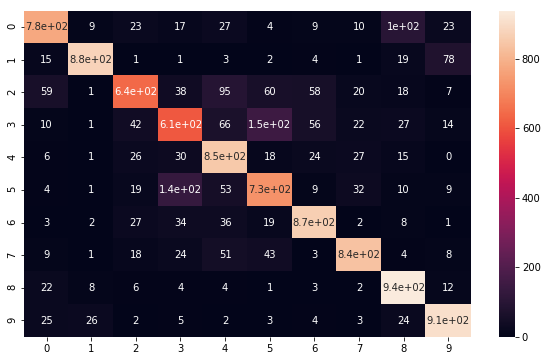

In [141]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [142]:
my_image = x_test[16]

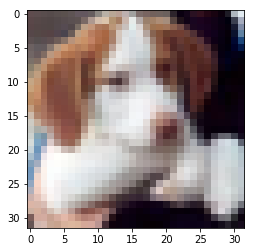

In [143]:
plt.imshow(my_image)

In [144]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)